<a href="https://colab.research.google.com/github/lazybuttrying/TensorFlow-Certificate/blob/main/C3/predict_a_word_sonnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐱‍🏍 Import

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import tensorflow as tf
import numpy as np 

# 📄 Prepare Dataset

In [2]:
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 20.3MB/s]


# ✂️ Tokenize

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# 🐍 Change to Sequence

In [4]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)






# 🌫️ Padding: Match the lenght of all setence

In [5]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [6]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

# 🕋 Define Model

In [7]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences = True)))# An LSTM Layer)
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, 
                activation='relu', 
                kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [8]:
# Pick an optimizer
model.compile(loss='categorical_crossentropy', # predict a word는 categorical_crossentropy!!
              optimizer='adam',  #tf.keras.optimizers.Adam(learning_rate=0.01)
              metrics=['accuracy'])
### END CODE HERE


# 🏃‍♂️ fit: training model

In [ ]:
model_save_path = "./"
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_save_path, 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='val_loss', #val_sparse_categorical_accuracy 
                                                verbose=1)


In [10]:
 history = model.fit(predictors, 
                     label, 
                     epochs=100, #150
                     callbacks = [checkpoint],
                     verbose=1)

Epoch 1/100
484/484 [==============================] - 56s 103ms/step - loss: 6.9111 - accuracy: 0.0210
Epoch 2/100
484/484 [==============================] - 50s 103ms/step - loss: 6.5034 - accuracy: 0.0243
Epoch 3/100
484/484 [==============================] - 50s 104ms/step - loss: 6.4119 - accuracy: 0.0219
Epoch 4/100
484/484 [==============================] - 50s 103ms/step - loss: 6.3030 - accuracy: 0.0275
Epoch 5/100
484/484 [==============================] - 50s 103ms/step - loss: 6.2088 - accuracy: 0.0345
Epoch 6/100
484/484 [==============================] - 50s 104ms/step - loss: 6.1437 - accuracy: 0.0372
Epoch 7/100
484/484 [==============================] - 51s 105ms/step - loss: 6.0778 - accuracy: 0.0400
Epoch 8/100
484/484 [==============================] - 51s 105ms/step - loss: 6.0048 - accuracy: 0.0438
Epoch 9/100
484/484 [==============================] - 51s 105ms/step - loss: 5.9197 - accuracy: 0.0500
Epoch 10/100
484/484 [==============================] - 52s 108m

# 💿 Get a best model

In [13]:
#model.load_weights(model_save_path)
model.save("predict a word - sonnets.h5")

# https://teddylee777.github.io/tensorflow/news-sarcasm
# Dense Layer를 깊게 쌓아 보거나,
# Conv1D 혹은 LSTM을 두 겹으로 쌓거나
# optimizer(adam)의 learning_rate를 높이거나 낮추는 방식으로
# 모델을 개선해보자

#📈 Plot accuracy & loss

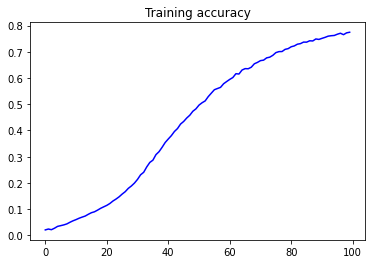

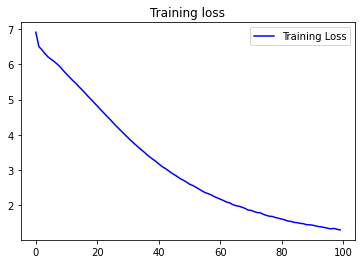

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# Test

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0), axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope but i have hell away dead writ must thee be hence thine words know thine eyes all thine eyes alone to me be less respect find dead gone on all thy dead days more cross ' best of cheeks love that love to thee tend tend tend needing exceed tend twain hate other strong friend cold strong friend strong friend best best in thee doth me be shown ever much dead kind on dear friend lie with thy friend to such ill say i all thee show his heart ' not so mine eye untrue despair so dear alone eye


# +) With Higher Learning Rate

In [23]:
model_save_path = "./"
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_save_path, 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='loss', #val_sparse_categorical_accuracy 
                                                verbose=1)


In [24]:
# Pick an optimizer
model.compile(loss='categorical_crossentropy', # predict a word는 categorical_crossentropy!!
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
### END CODE HERE


In [25]:
 history = model.fit(predictors, 
                     label, 
                     epochs=100, 
                     callbacks = [checkpoint],
                     verbose=1)

Epoch 1/100
484/484 [==============================] - ETA: 0s - loss: 5.4777 - accuracy: 0.0813
Epoch 00001: loss improved from inf to 5.47768, saving model to ./
484/484 [==============================] - 55s 103ms/step - loss: 5.4777 - accuracy: 0.0813
Epoch 2/100
484/484 [==============================] - ETA: 0s - loss: 5.1840 - accuracy: 0.0911
Epoch 00002: loss improved from 5.47768 to 5.18399, saving model to ./
484/484 [==============================] - 50s 103ms/step - loss: 5.1840 - accuracy: 0.0911
Epoch 3/100
484/484 [==============================] - ETA: 0s - loss: 5.0735 - accuracy: 0.0943
Epoch 00003: loss improved from 5.18399 to 5.07347, saving model to ./
484/484 [==============================] - 50s 104ms/step - loss: 5.0735 - accuracy: 0.0943
Epoch 4/100
484/484 [==============================] - ETA: 0s - loss: 4.9571 - accuracy: 0.1007
Epoch 00004: loss improved from 5.07347 to 4.95708, saving model to ./
484/484 [==============================] - 50s 103ms/ste

KeyboardInterrupt: ignored